# The Neighborhoods of Perth

## Section 1: Clustering the neighborhoods by their top venues

### Section 1a: Get a list of Perth neighborhoods

In [1]:
# Import necessary libraries
import requests
import lxml.html as lh

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import json # library to handle JSON files

#!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 102kB 9.3MB/s ta 0:00:011
Libraries imported.


In [2]:
# Import list of Australian suburbs and postcodes
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b83674cb44e9459ab2739d9a4f6c228f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DfllOK1hcWFKOWEoPK-qPU58EQ2SmbMEMjVXiOpUlcAh',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.ap-geo.objectstorage.service.networklayer.com')

body = client_b83674cb44e9459ab2739d9a4f6c228f.get_object(Bucket='capstoneproject-donotdelete-pr-xfxgwzqv3k1uke',Key='Australian_Post_Codes_Lat_Lon.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,postcode,suburb,state,dc,type,lat,lon
0,200,AUSTRALIAN NATIONAL UNIVERSITY,ACT,AUSTRALIAN NATIONAL UNI LPO,Post Office Boxes,-35.277272,149.117136
1,221,BARTON,ACT,NaN,LVR,-35.201372,149.095065
2,800,DARWIN,NT,DARWIN DELIVERY CENTRE,Delivery Area,-12.801028,130.955789
3,801,DARWIN,NT,DARWIN DELIVERY CENTRE,Post Office Boxes,-12.801028,130.955789
4,804,PARAP,NT,PARAP,Post Office Boxes,-12.432181,130.843310


In [3]:
# Restrict to Perth region (postcode in range 6000 - 6199)
df = df_data_1[(df_data_1['postcode'] >= 6000) & (df_data_1['postcode'] <= 6199)].reset_index(drop=True)
df.head()

,postcode,suburb,state,dc,type,lat,lon
0,6000,PERTH,WA,CITY DELIVERY CENTRE,Delivery Area,-31.924074,115.912230
1,6001,PERTH,WA,CITY DELIVERY CENTRE,Post Office Boxes,-31.992120,115.763228
2,6003,HIGHGATE,WA,CITY DELIVERY CENTRE,Delivery Area,-31.939272,115.869136
3,6003,NORTHBRIDGE,WA,CITY DELIVERY CENTRE,Delivery Area,-31.946969,115.857386
4,6004,EAST PERTH,WA,CITY DELIVERY CENTRE,Delivery Area,-31.943109,115.877401


### Section 1b: Use Foursquare API to explore Perth venues

#### Foursquare credentials below (hidden)

In [4]:
# @hidden_cell

# Get Foursquare credentials
CLIENT_ID = '0Q14LNWDKVFQ0LLG2E0JDKZ4M5K5D1P3ZIHGDLLBENI32BNC' # your Foursquare ID
CLIENT_SECRET = '15TIVA2UGGXM41UWELORCXQDLRRV0RELVB00IUEFUFE05OTS' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [ ]:
# Explore the neighbourhoods in Perth

LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
# Use the function above to explore the neighborhoods
perth_venues = getNearbyVenues(names=df['suburb'],
                                   latitudes=df['lat'],
                                   longitudes=df['lon']
                                  )


In [ ]:
# Save dataframe as csv file to avoid exceeding API calls
project = Project(None,"99c27b5f-dff7-4912-a344-d360f620b93c","p-268d7fa95cb29d024be2250a5b0f66928fb63c82")

project.save_data(file_name = "perthvenues.csv",data = perth_venues.to_csv(index=False))

In [4]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='99c27b5f-dff7-4912-a344-d360f620b93c', project_access_token='p-268d7fa95cb29d024be2250a5b0f66928fb63c82')
pc = project.project_context

In [5]:
# Import csv as dataframe to use 

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b83674cb44e9459ab2739d9a4f6c228f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DfllOK1hcWFKOWEoPK-qPU58EQ2SmbMEMjVXiOpUlcAh',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.ap-geo.objectstorage.service.networklayer.com')

body = client_b83674cb44e9459ab2739d9a4f6c228f.get_object(Bucket='capstoneproject-donotdelete-pr-xfxgwzqv3k1uke',Key='perthvenues.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

perth_venues = pd.read_csv(body)
perth_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,PERTH,-31.924074,115.91223,Bayswater Car Rental,-31.925850,115.908980,Rental Car Location
1,PERTH,-31.924074,115.91223,Liquor Barons Bayswater,-31.925394,115.910422,Liquor Store
2,PERTH,-31.924074,115.91223,Corleone Pizza Bar,-31.925926,115.910445,Pizza Place
3,PERTH,-31.924074,115.91223,AusRef,-31.927471,115.912499,Sporting Goods Shop
4,PERTH,-31.924074,115.91223,Bayswater Bowling and Recreation Club,-31.922721,115.907223,Sports Club


In [6]:
# Check unique categories 
print('There are {} uniques categories.'.format(len(perth_venues['Venue Category'].unique())))
print(perth_venues.shape)
perth_venues.head()

There are 224 uniques categories.
(1901, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,PERTH,-31.924074,115.91223,Bayswater Car Rental,-31.925850,115.908980,Rental Car Location
1,PERTH,-31.924074,115.91223,Liquor Barons Bayswater,-31.925394,115.910422,Liquor Store
2,PERTH,-31.924074,115.91223,Corleone Pizza Bar,-31.925926,115.910445,Pizza Place
3,PERTH,-31.924074,115.91223,AusRef,-31.927471,115.912499,Sporting Goods Shop
4,PERTH,-31.924074,115.91223,Bayswater Bowling and Recreation Club,-31.922721,115.907223,Sports Club


### Section 1c:  Prepare neighborhood data for clustering

In [7]:
#Use one hot encoding to get binary variables for each venue category

# one hot encoding
perth_onehot = pd.get_dummies(perth_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
perth_onehot['Neighborhood'] = perth_venues['Neighborhood'] 

# move neighborhood column to the first column
cols = list(perth_onehot)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Neighborhood')))
cols

# use loc to reorder
perth_onehot = perth_onehot.loc[:, cols]
perth_onehot.head()

,Neighborhood,Accessories Store,Airport,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Court,Beach,Beach Bar,Bed & Breakfast,Beer Garden,Beer Store,Big Box Store,Board Shop,Boat or Ferry,Bookstore,Bowling Green,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Campground,Cantonese Restaurant,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,College Cafeteria,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Dry Cleaner,Eastern European Restaurant,Electronics Store,Event Service,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,History Museum,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Laundromat,Lebanese Restaurant,Light Rail Station,Lighthouse,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Movie Theater,Multiplex,Museum,Music Store,Music Venue,National Park,Night Market,Nightclub,Noodle House,Other Repair Shop,Outlet Store,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Post Office,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Resort,Rest Area,Restaurant,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stationery Store,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tour Provider,Tourist Information Center,Trail,Train Station,Tree,Turkish Restaurant,Vacation Rental,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Warehouse Store,Water Park,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,PERTH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,PERTH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [8]:
# Group rows by neighborhood and get mean frequency of occurrence
perth_grouped = perth_onehot.groupby('Neighborhood').mean().reset_index()
perth_grouped

,Neighborhood,Accessories Store,Airport,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Court,Beach,Beach Bar,Bed & Breakfast,Beer Garden,Beer Store,Big Box Store,Board Shop,Boat or Ferry,Bookstore,Bowling Green,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Campground,Cantonese Restaurant,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,College Cafeteria,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Dry Cleaner,Eastern European Restaurant,Electronics Store,Event Service,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,History Museum,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Laundromat,Lebanese Restaurant,Light Rail Station,Lighthouse,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Movie Theater,Multiplex,Museum,Music Store,Music Venue,National Park,Night Market,Nightclub,Noodle House,Other Repair Shop,Outlet Store,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Post Office,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Resort,Rest Area,Restaurant,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stationery Store,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tour Provider,Tourist Information Center,Trail,Train Station,Tree,Turkish Restaurant,Vacation Rental,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Warehouse Store,Water Park,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,ALEXANDER HEIGHTS,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.250000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [9]:
# Print each neighborhood along with the top 5 venues
num_top_venues = 5

for hood in perth_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = perth_grouped[perth_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ALEXANDER HEIGHTS----
               venue  freq
0      Big Box Store  0.25
1          Gift Shop  0.25
2  Mobile Phone Shop  0.25
3               Park  0.25
4  Accessories Store  0.00


----ALFRED COVE----
                  venue  freq
0     Indian Restaurant  0.25
1                  Café  0.25
2  Gym / Fitness Center  0.25
3                   Bar  0.25
4     Accessories Store  0.00


----ALKIMOS----
                   venue  freq
0            Bus Station  0.33
1          Grocery Store  0.33
2                   Park  0.33
3      Accessories Store  0.00
4  Performing Arts Venue  0.00


----ANKETELL----
               venue  freq
0                Pub  0.33
1        Golf Course  0.33
2         Hobby Shop  0.33
3  Accessories Store  0.00
4   Pedestrian Plaza  0.00


----APPLECROSS----
                      venue  freq
0       Japanese Restaurant  0.13
1        Italian Restaurant  0.07
2  Mediterranean Restaurant  0.07
3                      Café  0.07
4      Cantonese Restaurant  0.07


                  venue  freq
0  Fast Food Restaurant  0.14
1      Department Store  0.09
2           Supermarket  0.09
3                  Café  0.06
4               Brewery  0.03


----CARINE----
                        venue  freq
0  Construction & Landscaping   0.5
1          Athletics & Sports   0.5
2           Accessories Store   0.0
3                   Pet Store   0.0
4               National Park   0.0


----CARLISLE----
                venue  freq
0  Italian Restaurant  0.25
1     Thai Restaurant  0.12
2         Coffee Shop  0.12
3       Grocery Store  0.12
4        Liquor Store  0.12


----CARLISLE NORTH----
                venue  freq
0  Italian Restaurant  0.25
1     Thai Restaurant  0.12
2         Coffee Shop  0.12
3       Grocery Store  0.12
4        Liquor Store  0.12


----CARLISLE SOUTH----
                        venue  freq
0  Construction & Landscaping  0.25
1                         Gym  0.25
2               Train Station  0.25
3          Chinese Restaurant  0.25
4 

                  venue  freq
0  Fast Food Restaurant  0.67
1          Soccer Field  0.33
2           Record Shop  0.00
3         National Park  0.00
4          Night Market  0.00


----FERNDALE----
                   venue  freq
0                    Pub  0.25
1                   Park  0.25
2  Australian Restaurant  0.25
3     Chinese Restaurant  0.25
4      Accessories Store  0.00


----FLOREAT----
                 venue  freq
0        Shopping Mall  0.12
1          Coffee Shop  0.12
2          Supermarket  0.12
3  Japanese Restaurant  0.06
4       Cosmetics Shop  0.06


----FLOREAT FORUM----
                 venue  freq
0        Shopping Mall  0.12
1          Coffee Shop  0.12
2          Supermarket  0.12
3  Japanese Restaurant  0.06
4       Cosmetics Shop  0.06


----FORRESTDALE----
               venue  freq
0  Other Repair Shop   1.0
1  Accessories Store   0.0
2            Airport   0.0
3        Music Venue   0.0
4      National Park   0.0


----FORRESTFIELD----
                  

                   venue  freq
0                    Pub   1.0
1      Accessories Store   0.0
2  Performing Arts Venue   0.0
3            Music Venue   0.0
4          National Park   0.0


----KARRAKATTA----
                   venue  freq
0        Warehouse Store   0.5
1          Train Station   0.5
2      Accessories Store   0.0
3  Performing Arts Venue   0.0
4            Music Venue   0.0


----KARRINYUP----
                  venue  freq
0      Department Store  0.23
1            Food Court  0.15
2             Bookstore  0.08
3             Juice Bar  0.08
4  Fast Food Restaurant  0.08


----KELMSCOTT----
                  venue  freq
0  Fast Food Restaurant  0.25
1           Pizza Place  0.12
2         Grocery Store  0.12
3           Supermarket  0.06
4         Shopping Mall  0.06


----KENSINGTON----
                   venue  freq
0             Playground  0.50
1        Thai Restaurant  0.25
2                   Café  0.25
3      Accessories Store  0.00
4  Performing Arts Venue  0.00


                   venue  freq
0                  Beach   0.5
1                  Trail   0.5
2      Accessories Store   0.0
3  Performing Arts Venue   0.0
4          National Park   0.0


----MIRRABOOKA----
                   venue  freq
0          Grocery Store   0.4
1  Vietnamese Restaurant   0.4
2                   Café   0.2
3      Accessories Store   0.0
4  Performing Arts Venue   0.0


----MORLEY----
                 venue  freq
0          Gas Station  0.25
1     Department Store  0.12
2  Sporting Goods Shop  0.12
3            Juice Bar  0.12
4          Salad Place  0.12


----MOSMAN PARK----
                  venue  freq
0   Japanese Restaurant  0.11
1        Sandwich Place  0.11
2         Grocery Store  0.11
3           Snack Place  0.11
4  Fast Food Restaurant  0.11


----MOUNT CLAREMONT----
                venue  freq
0              Bakery  0.25
1  Miscellaneous Shop  0.25
2                Café  0.25
3      Clothing Store  0.25
4   Accessories Store  0.00


----MOUNT HAWTHORN

               venue  freq
0             Bakery  0.25
1               Café  0.25
2      Grocery Store  0.25
3      Shopping Mall  0.25
4  Accessories Store  0.00


----REDCLIFFE----
                 venue  freq
0  Sporting Goods Shop  0.18
1    Accessories Store  0.09
2      Bubble Tea Shop  0.09
3                Hotel  0.09
4         Outlet Store  0.09


----RIDGEWOOD----
                venue  freq
0  Athletics & Sports   1.0
1   Accessories Store   0.0
2           Pet Store   0.0
3       National Park   0.0
4        Night Market   0.0


----RIVERTON----
                venue  freq
0  Italian Restaurant  0.25
1       Event Service  0.25
2        Liquor Store  0.25
3       Deli / Bodega  0.25
4              Winery  0.00


----RIVERVALE----
                  venue  freq
0                 Hotel  0.21
1  Fast Food Restaurant  0.14
2         Deli / Bodega  0.14
3      Sushi Restaurant  0.07
4        Sandwich Place  0.07


----ROCKINGHAM----
              venue  freq
0              Café  0

           venue  freq
0      Pet Store   1.0
1        Airport   0.0
2    Music Venue   0.0
3  National Park   0.0
4   Night Market   0.0


----WANNEROO----
                  venue  freq
0  Fast Food Restaurant  0.23
1                  Café  0.15
2      Department Store  0.08
3            Restaurant  0.08
4              Gym Pool  0.08


----WARNBRO----
                  venue  freq
0  Gym / Fitness Center   1.0
1     Accessories Store   0.0
2           Music Store   0.0
3         National Park   0.0
4          Night Market   0.0


----WARWICK----
                  venue  freq
0  Fast Food Restaurant  0.25
1                  Café  0.17
2         Shopping Mall  0.08
3           Supermarket  0.08
4      Video Game Store  0.08


----WATERFORD----
                     venue  freq
0                   Market   0.5
1  Fruit & Vegetable Store   0.5
2            National Park   0.0
3             Night Market   0.0
4                Nightclub   0.0


----WELSHPOOL----
                        venue

#### Get the top 10 venues per neighbourhood

In [10]:
# Create function to sort venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [11]:
# Create dataframe and display top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = perth_grouped['Neighborhood']

for ind in np.arange(perth_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(perth_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ALEXANDER HEIGHTS,Mobile Phone Shop,Big Box Store,Gift Shop,Park,Yoga Studio,Frozen Yogurt Shop,French Restaurant,Football Stadium,Food Truck,Food Court
1,ALFRED COVE,Gym / Fitness Center,Indian Restaurant,Café,Bar,Yoga Studio,French Restaurant,Football Stadium,Food Truck,Food Court,Food & Drink Shop
2,ALKIMOS,Bus Station,Grocery Store,Park,Yoga Studio,Fried Chicken Joint,Football Stadium,Food Truck,Food Court,Food & Drink Shop,Food
3,ANKETELL,Pub,Hobby Shop,Golf Course,Yoga Studio,Farm,Football Stadium,Food Truck,Food Court,Food & Drink Shop,Food
4,APPLECROSS,Japanese Restaurant,Ice Cream Shop,Hawaiian Restaurant,Café,Cantonese Restaurant,Chinese Restaurant,Mediterranean Restaurant,Beach,Grocery Store,Coffee Shop


### Section 1d: Cluster the neighborhoods based on venue frequency

#### Use elbow method to determine optimal number of clusters

Text(0, 0.5, 'Inertia')

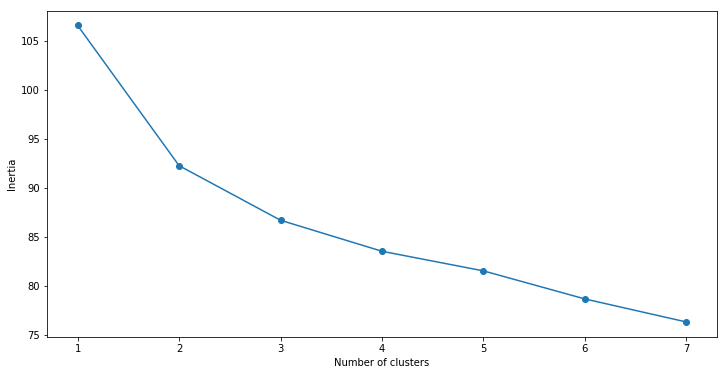

In [12]:
perth_grouped_clustering = perth_grouped.drop('Neighborhood', 1)

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,8):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(perth_grouped_clustering)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,8), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

#### Use the mean frequency of the categories to cluster neighbourhoods

In [13]:
# Run k-means to cluster the neighborhoods into 5 clusters

# set number of clusters to 6 based on above analysis
kclusters = 6

perth_grouped_clustering = perth_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(perth_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 4, 3, 1, 1, 1, 1, 5, 2, 3], dtype=int32)

In [14]:
# Create a new dataframe that includes cluster as well as top 10 venues

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
perth_merged = df

# merge perth_grouped with df to add latitude/longitude for each neighborhood
perth_merged = perth_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='suburb')

perth_merged.head() 

,postcode,suburb,state,dc,type,lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,6000,PERTH,WA,CITY DELIVERY CENTRE,Delivery Area,-31.924074,115.912230,1.0,Liquor Store,Cosmetics Shop,Rental Car Location,Sports Club,Pizza Place,Sporting Goods Shop,Falafel Restaurant,Food Court,Food & Drink Shop,Food
1,6001,PERTH,WA,CITY DELIVERY CENTRE,Post Office Boxes,-31.992120,115.763228,1.0,Liquor Store,Cosmetics Shop,Rental Car Location,Sports Club,Pizza Place,Sporting Goods Shop,Falafel Restaurant,Food Court,Food & Drink Shop,Food
2,6003,HIGHGATE,WA,CITY DELIVERY CENTRE,Delivery Area,-31.939272,115.869136,1.0,Bakery,Café,Mexican Restaurant,Restaurant,Tapas Restaurant,Beer Garden,BBQ Joint,Coffee Shop,Eastern European Restaurant,Vegetarian / Vegan Restaurant
3,6003,NORTHBRIDGE,WA,CITY DELIVERY CENTRE,Delivery Area,-31.946969,115.857386,1.0,Café,Hotel,Chinese Restaurant,Coffee Shop,Mexican Restaurant,Vietnamese Restaurant,Cocktail Bar,Speakeasy,Brewery,Martial Arts Dojo
4,6004,EAST PERTH,WA,CITY DELIVERY CENTRE,Delivery Area,-31.943109,115.877401,4.0,Indonesian Restaurant,Dog Run,Café,Train Station,Farmers Market,French Restaurant,Football Stadium,Food Truck,Food Court,Food & Drink Shop


In [15]:
# Remove any rows with missing values
perth_merged=perth_merged.dropna()

# Change cluster labels to integer
perth_merged['Cluster Labels']=perth_merged['Cluster Labels'].astype(int)

perth_merged.head()

,postcode,suburb,state,dc,type,lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,6000,PERTH,WA,CITY DELIVERY CENTRE,Delivery Area,-31.924074,115.912230,1,Liquor Store,Cosmetics Shop,Rental Car Location,Sports Club,Pizza Place,Sporting Goods Shop,Falafel Restaurant,Food Court,Food & Drink Shop,Food
1,6001,PERTH,WA,CITY DELIVERY CENTRE,Post Office Boxes,-31.992120,115.763228,1,Liquor Store,Cosmetics Shop,Rental Car Location,Sports Club,Pizza Place,Sporting Goods Shop,Falafel Restaurant,Food Court,Food & Drink Shop,Food
2,6003,HIGHGATE,WA,CITY DELIVERY CENTRE,Delivery Area,-31.939272,115.869136,1,Bakery,Café,Mexican Restaurant,Restaurant,Tapas Restaurant,Beer Garden,BBQ Joint,Coffee Shop,Eastern European Restaurant,Vegetarian / Vegan Restaurant
3,6003,NORTHBRIDGE,WA,CITY DELIVERY CENTRE,Delivery Area,-31.946969,115.857386,1,Café,Hotel,Chinese Restaurant,Coffee Shop,Mexican Restaurant,Vietnamese Restaurant,Cocktail Bar,Speakeasy,Brewery,Martial Arts Dojo
4,6004,EAST PERTH,WA,CITY DELIVERY CENTRE,Delivery Area,-31.943109,115.877401,4,Indonesian Restaurant,Dog Run,Café,Train Station,Farmers Market,French Restaurant,Football Stadium,Food Truck,Food Court,Food & Drink Shop


### Section 1e: Assign descriptive labels to the clusters

In [16]:
# Get the top 3 venue categories for each cluster

# Cluster 1
print('Cluster 1 \n' + '1st Most Common Venue: ' + perth_merged.loc[perth_merged['Cluster Labels'] == 0]['1st Most Common Venue'].value_counts().idxmax()\
     + '\n' + '2nd Most Common Venue: ' + perth_merged.loc[perth_merged['Cluster Labels'] == 0]['2nd Most Common Venue'].value_counts().idxmax()\
     + '\n' + '3rd Most Common Venue: ' + perth_merged.loc[perth_merged['Cluster Labels'] == 0]['3rd Most Common Venue'].value_counts().idxmax())

# Cluster 2
print('\n Cluster 2 \n' + '1st Most Common Venue: ' + perth_merged.loc[perth_merged['Cluster Labels'] == 1]['1st Most Common Venue'].value_counts().idxmax()\
     + '\n' + '2nd Most Common Venue: ' + perth_merged.loc[perth_merged['Cluster Labels'] == 1]['2nd Most Common Venue'].value_counts().idxmax()\
     + '\n' + '3rd Most Common Venue: ' + perth_merged.loc[perth_merged['Cluster Labels'] == 1]['3rd Most Common Venue'].value_counts().idxmax())

# Cluster 3
print('\n Cluster 3 \n' + '1st Most Common Venue: ' + perth_merged.loc[perth_merged['Cluster Labels'] == 2]['1st Most Common Venue'].value_counts().idxmax()\
     + '\n' + '2nd Most Common Venue: ' + perth_merged.loc[perth_merged['Cluster Labels'] == 2]['2nd Most Common Venue'].value_counts().idxmax()\
     + '\n' + '3rd Most Common Venue: ' + perth_merged.loc[perth_merged['Cluster Labels'] == 2]['3rd Most Common Venue'].value_counts().idxmax())

# Cluster 4
print('\n Cluster 4 \n' + '1st Most Common Venue: ' + perth_merged.loc[perth_merged['Cluster Labels'] == 3]['1st Most Common Venue'].value_counts().idxmax()\
     + '\n' + '2nd Most Common Venue: ' + perth_merged.loc[perth_merged['Cluster Labels'] == 3]['2nd Most Common Venue'].value_counts().idxmax()\
     + '\n' + '3rd Most Common Venue: ' + perth_merged.loc[perth_merged['Cluster Labels'] == 3]['3rd Most Common Venue'].value_counts().idxmax())

# Cluster 5
print('\n Cluster 5 \n' + '1st Most Common Venue: ' + perth_merged.loc[perth_merged['Cluster Labels'] == 4]['1st Most Common Venue'].value_counts().idxmax()\
     + '\n' + '2nd Most Common Venue: ' + perth_merged.loc[perth_merged['Cluster Labels'] == 4]['2nd Most Common Venue'].value_counts().idxmax()\
     + '\n' + '3rd Most Common Venue: ' + perth_merged.loc[perth_merged['Cluster Labels'] == 4]['3rd Most Common Venue'].value_counts().idxmax())

# Cluster 6
print('\n Cluster 6 \n' + '1st Most Common Venue: ' + perth_merged.loc[perth_merged['Cluster Labels'] == 5]['1st Most Common Venue'].value_counts().idxmax()\
     + '\n' + '2nd Most Common Venue: ' + perth_merged.loc[perth_merged['Cluster Labels'] == 5]['2nd Most Common Venue'].value_counts().idxmax()\
     + '\n' + '3rd Most Common Venue: ' + perth_merged.loc[perth_merged['Cluster Labels'] == 5]['3rd Most Common Venue'].value_counts().idxmax())


Cluster 1 
1st Most Common Venue: Playground
2nd Most Common Venue: IT Services
3rd Most Common Venue: Farm

 Cluster 2 
1st Most Common Venue: Café
2nd Most Common Venue: Yoga Studio
3rd Most Common Venue: Farm

 Cluster 3 
1st Most Common Venue: Park
2nd Most Common Venue: Yoga Studio
3rd Most Common Venue: Indie Movie Theater

 Cluster 4 
1st Most Common Venue: Shopping Mall
2nd Most Common Venue: Grocery Store
3rd Most Common Venue: Grocery Store

 Cluster 5 
1st Most Common Venue: Café
2nd Most Common Venue: Café
3rd Most Common Venue: Café

 Cluster 6 
1st Most Common Venue: Fast Food Restaurant
2nd Most Common Venue: Fast Food Restaurant
3rd Most Common Venue: Supermarket


In [17]:
# Label the clusters

def conditions(perth_merged):
    if (perth_merged['Cluster Labels'] == 0):
        return 'Family Friendly' 
    if (perth_merged['Cluster Labels'] == 1):
        return 'Coffee and Yoga Enthusiasts'
    if (perth_merged['Cluster Labels'] == 2):
        return 'Fitness and Entertainment'
    if (perth_merged['Cluster Labels'] == 3):
        return 'Shopping Oasis'
    if (perth_merged['Cluster Labels'] == 4):
        return 'Cafe Haven'
    if (perth_merged['Cluster Labels'] == 5):
        return 'Convenient Living'
    else:
        return 'Unknown'
    
perth_merged['Cluster Names'] = perth_merged.apply(conditions, axis=1)
perth_merged.head()   

,postcode,suburb,state,dc,type,lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Names
0,6000,PERTH,WA,CITY DELIVERY CENTRE,Delivery Area,-31.924074,115.912230,1,Liquor Store,Cosmetics Shop,Rental Car Location,Sports Club,Pizza Place,Sporting Goods Shop,Falafel Restaurant,Food Court,Food & Drink Shop,Food,Coffee and Yoga Enthusiasts
1,6001,PERTH,WA,CITY DELIVERY CENTRE,Post Office Boxes,-31.992120,115.763228,1,Liquor Store,Cosmetics Shop,Rental Car Location,Sports Club,Pizza Place,Sporting Goods Shop,Falafel Restaurant,Food Court,Food & Drink Shop,Food,Coffee and Yoga Enthusiasts
2,6003,HIGHGATE,WA,CITY DELIVERY CENTRE,Delivery Area,-31.939272,115.869136,1,Bakery,Café,Mexican Restaurant,Restaurant,Tapas Restaurant,Beer Garden,BBQ Joint,Coffee Shop,Eastern European Restaurant,Vegetarian / Vegan Restaurant,Coffee and Yoga Enthusiasts
3,6003,NORTHBRIDGE,WA,CITY DELIVERY CENTRE,Delivery Area,-31.946969,115.857386,1,Café,Hotel,Chinese Restaurant,Coffee Shop,Mexican Restaurant,Vietnamese Restaurant,Cocktail Bar,Speakeasy,Brewery,Martial Arts Dojo,Coffee and Yoga Enthusiasts
4,6004,EAST PERTH,WA,CITY DELIVERY CENTRE,Delivery Area,-31.943109,115.877401,4,Indonesian Restaurant,Dog Run,Café,Train Station,Farmers Market,French Restaurant,Football Stadium,Food Truck,Food Court,Food & Drink Shop,Cafe Haven


## Section 2: Adding the median house prices

In [18]:
# Import median house prices dataset

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b83674cb44e9459ab2739d9a4f6c228f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DfllOK1hcWFKOWEoPK-qPU58EQ2SmbMEMjVXiOpUlcAh',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.ap-geo.objectstorage.service.networklayer.com')

body = client_b83674cb44e9459ab2739d9a4f6c228f.get_object(Bucket='capstoneproject-donotdelete-pr-xfxgwzqv3k1uke',Key='Perth_Housing_Prices.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_0 = pd.read_excel(body)
df_data_0.head()


,Suburb,Median House Price,Growth Percentage
0,Alexander Heights,410000,-0.024
1,Alfred Cove,843000,0.047
2,Alkimos,390000,-0.049
3,Anketell,0,0.000
4,Applecross,1600000,0.041


In [19]:
# Change suburb to capital letters to match housing prices
df_data_0['Suburb'] = df_data_0['Suburb'].str.upper()
df_data_0.head()

,Suburb,Median House Price,Growth Percentage
0,ALEXANDER HEIGHTS,410000,-0.024
1,ALFRED COVE,843000,0.047
2,ALKIMOS,390000,-0.049
3,ANKETELL,0,0.000
4,APPLECROSS,1600000,0.041


In [20]:
# Merge Perth venues with housing prices
house_merged = df_data_0.join(perth_merged.set_index('suburb'), on='Suburb')
house_merged.head()

,Suburb,Median House Price,Growth Percentage,postcode,state,dc,type,lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Names
0,ALEXANDER HEIGHTS,410000,-0.024,6064.0,WA,MALAGA DC,Delivery Area,-31.827610,115.867134,1.0,Mobile Phone Shop,Big Box Store,Gift Shop,Park,Yoga Studio,Frozen Yogurt Shop,French Restaurant,Football Stadium,Food Truck,Food Court,Coffee and Yoga Enthusiasts
1,ALFRED COVE,843000,0.047,6154.0,WA,PALMYRA DC,Delivery Area,-32.034236,115.808606,4.0,Gym / Fitness Center,Indian Restaurant,Café,Bar,Yoga Studio,French Restaurant,Football Stadium,Food Truck,Food Court,Food & Drink Shop,Cafe Haven
2,ALKIMOS,390000,-0.049,6038.0,WA,JOONDALUP DC,Delivery Area,-32.289149,115.723047,3.0,Bus Station,Grocery Store,Park,Yoga Studio,Fried Chicken Joint,Football Stadium,Food Truck,Food Court,Food & Drink Shop,Food,Shopping Oasis
3,ANKETELL,0,0.000,6167.0,WA,ROCKINGHAM DC,Delivery Area,-32.227693,115.870492,1.0,Pub,Hobby Shop,Golf Course,Yoga Studio,Farm,Football Stadium,Food Truck,Food Court,Food & Drink Shop,Food,Coffee and Yoga Enthusiasts
4,APPLECROSS,1600000,0.041,6153.0,WA,PALMYRA DC,Delivery Area,-32.019400,115.833223,1.0,Japanese Restaurant,Ice Cream Shop,Hawaiian Restaurant,Café,Cantonese Restaurant,Chinese Restaurant,Mediterranean Restaurant,Beach,Grocery Store,Coffee Shop,Coffee and Yoga Enthusiasts


In [21]:
# Get the average median house price for Perth overall
perth_median = house_merged['Median House Price'].mean()

# Calculate the percentage difference between each neighborhoods median house price and the Perth average
house_merged['price_diff'] = (((house_merged['Median House Price']/perth_median)-1)*100).round(1).astype(int)
house_merged['price_diff'] = house_merged.price_diff.map(str) + "%"

# Drop any missing values
house_merged.dropna(inplace=True)

# Convert cluster labels to integers
house_merged['Cluster Labels'] = house_merged['Cluster Labels'].astype(int)

house_merged.head()

,Suburb,Median House Price,Growth Percentage,postcode,state,dc,type,lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Names,price_diff
0,ALEXANDER HEIGHTS,410000,-0.024,6064.0,WA,MALAGA DC,Delivery Area,-31.827610,115.867134,1,Mobile Phone Shop,Big Box Store,Gift Shop,Park,Yoga Studio,Frozen Yogurt Shop,French Restaurant,Football Stadium,Food Truck,Food Court,Coffee and Yoga Enthusiasts,-21%
1,ALFRED COVE,843000,0.047,6154.0,WA,PALMYRA DC,Delivery Area,-32.034236,115.808606,4,Gym / Fitness Center,Indian Restaurant,Café,Bar,Yoga Studio,French Restaurant,Football Stadium,Food Truck,Food Court,Food & Drink Shop,Cafe Haven,61%
2,ALKIMOS,390000,-0.049,6038.0,WA,JOONDALUP DC,Delivery Area,-32.289149,115.723047,3,Bus Station,Grocery Store,Park,Yoga Studio,Fried Chicken Joint,Football Stadium,Food Truck,Food Court,Food & Drink Shop,Food,Shopping Oasis,-25%
3,ANKETELL,0,0.000,6167.0,WA,ROCKINGHAM DC,Delivery Area,-32.227693,115.870492,1,Pub,Hobby Shop,Golf Course,Yoga Studio,Farm,Football Stadium,Food Truck,Food Court,Food & Drink Shop,Food,Coffee and Yoga Enthusiasts,-100%
4,APPLECROSS,1600000,0.041,6153.0,WA,PALMYRA DC,Delivery Area,-32.019400,115.833223,1,Japanese Restaurant,Ice Cream Shop,Hawaiian Restaurant,Café,Cantonese Restaurant,Chinese Restaurant,Mediterranean Restaurant,Beach,Grocery Store,Coffee Shop,Coffee and Yoga Enthusiasts,207%


In [22]:
# Use geopy library to get latitude and longitude coordinates of Perth

address = 'Perth, WA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of Perth are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Perth are -31.9527121, 115.8604796.


In [23]:
# Visualise the clustering results

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, clustername, median, diff in zip(house_merged['lat'], house_merged['lon'], house_merged['Suburb'], house_merged['Cluster Labels'], house_merged['Cluster Names'], house_merged['Median House Price'], house_merged['price_diff']):
    label = folium.Popup('Neighborhood: ' + str(poi) + '\n' + '"' + str(clustername) + '"' + '\n' + 'Median House Price: ' + '$' + str(median) + '\n' + 'Perth Average Comparison: ' + diff, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters